In [2]:
# importing packages and load data
import pandas as pd
import numpy as np
df = pd.read_csv('/kaggle/input/spotify-dataset/spotify_dataset.csv')
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,popularity,decade
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1,60s
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0,60s
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0,60s
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0,60s
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0,60s


In [3]:
df.shape

(41099, 20)

<AxesSubplot: >

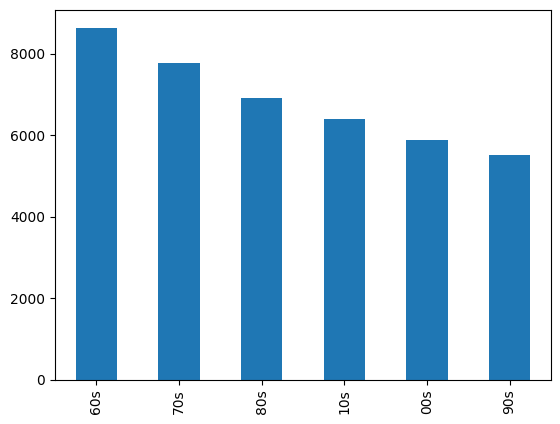

In [2]:
# visual was used in PowerPoint ot understand the deacade o music
df['decade'].value_counts().plot(kind='bar')

In [3]:
# create a function to find more in-depth stats
def simple_analysis(df):
    print(df.shape)
    print(df.describe())
    print(df.info())
    print(df.isnull().sum())

In [4]:
simple_analysis(df)

(41099, 20)
       danceability        energy           key      loudness          mode  \
count  41099.000000  41099.000000  41099.000000  41099.000000  41099.000000   
mean       0.539683      0.579544      5.213752    -10.221446      0.693375   
std        0.177808      0.252629      3.535060      5.311227      0.461098   
min        0.000000      0.000251      0.000000    -49.253000      0.000000   
25%        0.420000      0.396000      2.000000    -12.816500      0.000000   
50%        0.552000      0.601000      5.000000     -9.257000      1.000000   
75%        0.669000      0.787000      8.000000     -6.375000      1.000000   
max        0.988000      1.000000     11.000000      3.744000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  41099.000000  41099.000000      41099.000000  41099.000000   
mean       0.072952      0.364232          0.154403      0.201534   
std        0.086106      0.338908          0.303518      0.172957   


In [5]:
df = df.drop(columns=['track','artist','uri','decade'])

In [6]:
# This section involves model build
# Seeing how each model work without paramters 
# Droppped certain columns 
from sklearn.model_selection import train_test_split
# Features 
X = df.drop(columns=['energy']).values
y = df['energy'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print("Linear Regression score",lr.score(X_test,y_test))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Linear Regression score 0.7622781774814914


In [7]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
print("KNNscore",knn.score(X_test,y_test))

KNNscore -0.07234570111863237


In [8]:
from sklearn.linear_model import Lasso,Ridge
lasso = Lasso()
ridge = Ridge()
lasso.fit(X_train,y_train)
ridge.fit(X_train,y_train)
print("Lasso score",lasso.score(X_test,y_test))
print("Ridge score",ridge.score(X_test,y_test))

Lasso score 0.05726886538997111
Ridge score 0.7622747489478352


In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

In [10]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
print("Decision Tree score",dt.score(X_test,y_test))

Decision Tree score 0.6593521651365223


In [11]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
print("RandomForest score",rf.score(X_test,y_test))

RandomForest score 0.8331563852799558


In [12]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
print("Gradient Boost score",gbr.score(X_test,y_test))

Gradient Boost score 0.8206396285906424


In [13]:
mlp = MLPRegressor()
mlp.fit(X_train,y_train)
print("Neural Netwrok score",mlp.score(X_test,y_test))

Neural Netwrok score -12.631995301611619


In [14]:
# Bad score for some and good score for other. Lets add some parameters
# I would like to scale my data also
# Using a pipeline for each ML model so, I can scaler my data and run loops through it

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([ 
                 ("scaler", StandardScaler()), 
                 ("regressor", Lasso())
                ])
param_grid = [{'regressor': [Lasso()],
              'regressor__alpha': [1,0.1,0.01,0.001,0.0001,0.00001]} # random numbers I picked
             ]
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)

grid.fit(X_train, y_train)

print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Test set accuracy: {:.2f}".format(grid.score(X_test, y_test)))

Best cross-validation accuracy: 0.77
Best parameters:  {'regressor': Lasso(alpha=0.0001), 'regressor__alpha': 0.0001}
Test set accuracy: 0.76


In [16]:
pipe = Pipeline([ 
                 ("scaler", StandardScaler()), 
                 ("regressor", Ridge())
                ])
param_grid = [{'regressor': [Ridge()],
              'regressor__alpha': [1,0.1,0.01,0.001,0.0001,0.00001]} # random numbers I picked
             ]
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)

grid.fit(X_train, y_train)

print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Test set accuracy: {:.2f}".format(grid.score(X_test, y_test)))

Best cross-validation accuracy: 0.77
Best parameters:  {'regressor': Ridge(alpha=1), 'regressor__alpha': 1}
Test set accuracy: 0.76


In [17]:
param_grid =  [{'regressor': [DecisionTreeRegressor()],
              'regressor__max_depth': [3, 5, 9, 11, 13, 15]}
              ]
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)

grid.fit(X_train, y_train)

print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Test set accuracy: {:.2f}".format(grid.score(X_test, y_test)))

Best cross-validation accuracy: 0.78
Best parameters:  {'regressor': DecisionTreeRegressor(max_depth=9), 'regressor__max_depth': 9}
Test set accuracy: 0.77


In [18]:
param_grid =  [{'regressor': [RandomForestRegressor()],
              'regressor__max_depth': [50,60,70,80,90,100,110,12,0,130,140,150]}
              ]
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)

grid.fit(X_train, y_train)

print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Test set accuracy: {:.2f}".format(grid.score(X_test, y_test)))

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/opt/conda/lib/python3.10/site-packages

Best cross-validation accuracy: 0.84
Best parameters:  {'regressor': RandomForestRegressor(max_depth=60), 'regressor__max_depth': 60}
Test set accuracy: 0.83


In [19]:
param_grid =  [{'regressor': [KNeighborsRegressor()],
              'regressor__n_neighbors': [15,20,25,30,35,40,45,50]}
              ]
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)

grid.fit(X_train, y_train)

print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Test set accuracy: {:.2f}".format(grid.score(X_test, y_test)))

Best cross-validation accuracy: 0.77
Best parameters:  {'regressor': KNeighborsRegressor(n_neighbors=15), 'regressor__n_neighbors': 15}
Test set accuracy: 0.76


In [20]:
param_grid =  [{'regressor': [GradientBoostingRegressor()],
              'regressor__learning_rate': [0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39]}
              ]
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)

grid.fit(X_train, y_train)

print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Test set accuracy: {:.2f}".format(grid.score(X_test, y_test)))

Best cross-validation accuracy: 0.84
Best parameters:  {'regressor': GradientBoostingRegressor(learning_rate=0.31), 'regressor__learning_rate': 0.31}
Test set accuracy: 0.83


In [21]:
param_grid =  [{'regressor': [MLPRegressor(solver='lbfgs', max_iter=5000)],
              'regressor__hidden_layer_sizes': [(1,), (10,), (10, 5), 
                                                (20,), (20, 5), (20, 10), 
                                                (30,), (30, 5), (30, 10), (30, 20),
                                                (40,), (40, 5), (40, 10), (40, 20)],
              'regressor__alpha': [0.1,1,10,20,30],
              'regressor__activation': ['relu', 'tanh']}
              ]
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)

grid.fit(X_train, y_train)

print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Test set accuracy: {:.2f}".format(grid.score(X_test, y_test)))

Best cross-validation accuracy: 0.84
Best parameters:  {'regressor': MLPRegressor(alpha=1, hidden_layer_sizes=(40, 20), max_iter=5000,
             solver='lbfgs'), 'regressor__activation': 'relu', 'regressor__alpha': 1, 'regressor__hidden_layer_sizes': (40, 20)}
Test set accuracy: 0.84


In [22]:
# I've scaled all of my data
# I want to put the Pipelines and models together
# I want to see the best overall score from my models

In [ ]:
pipe = Pipeline([ 
                 ("scaler", StandardScaler()), 
                 ("regressor", Lasso())
                ])
param_grid = [{'regressor': [Ridge()],
              'regressor__alpha': [1,0.1,0.01,0.001,0.0001,0.00001]},
              {'regressor': [Lasso()],
              'regressor__alpha': [1,0.1,0.01,0.001,0.0001,0.00001]},
              {'regressor':[LinearRegression()]},
              {'regressor': [DecisionTreeRegressor()],
              'regressor__max_depth': [3, 5, 9, 11, 13, 15]},
              {'regressor': [RandomForestRegressor()],
              'regressor__max_depth': [150,60,70,80,90,100,110,12,0,130,140,150]},
              {'regressor': [KNeighborsRegressor()],
              'regressor__n_neighbors': [15,20,25,30,35,40,45,50]},
              {'regressor': [GradientBoostingRegressor()],
              'regressor__learning_rate': [0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39]},
              {'regressor': [MLPRegressor(solver='lbfgs', max_iter=5000)],
              'regressor__hidden_layer_sizes': [(1,), (10,), (10, 5), 
                                                (20,), (20, 5), (20, 10), 
                                                (30,), (30, 5), (30, 10), (30, 20),
                                                (40,), (40, 5), (40, 10), (40, 20)],
              'regressor__alpha': [0.1,1,10,20,30],
              'regressor__activation': ['relu', 'tanh']}
              
             ]
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)

grid.fit(X_train, y_train)

print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Test set accuracy: {:.2f}".format(grid.score(X_test, y_test)))